In [65]:
import os
import sys
MAIN_PATH = os.path.dirname(os.getcwd())

sys.path.insert(0, MAIN_PATH)

import librosa
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import maximum_filter
import librosa.display

In [66]:
y_org, sr = librosa.load(os.path.join(MAIN_PATH, 'data/055-Coldplay-Viva La Vida.wav'), sr=8000, duration=11)
y_noise_high, sr = librosa.load(os.path.join(MAIN_PATH, 'data/high_t.wav'), sr=8000, duration=12)
y_noise_low, sr = librosa.load(os.path.join(MAIN_PATH, 'data/low_t.wav'), sr=8000, duration=12)

In [67]:
S_org = fft(y_org)
S_noise_high = fft(y_noise_high)
S_noise_low = fft(y_noise_low)

In [68]:
f = fftfreq(y_org.size, d=1/sr)

In [69]:
N = y_org.size // 2

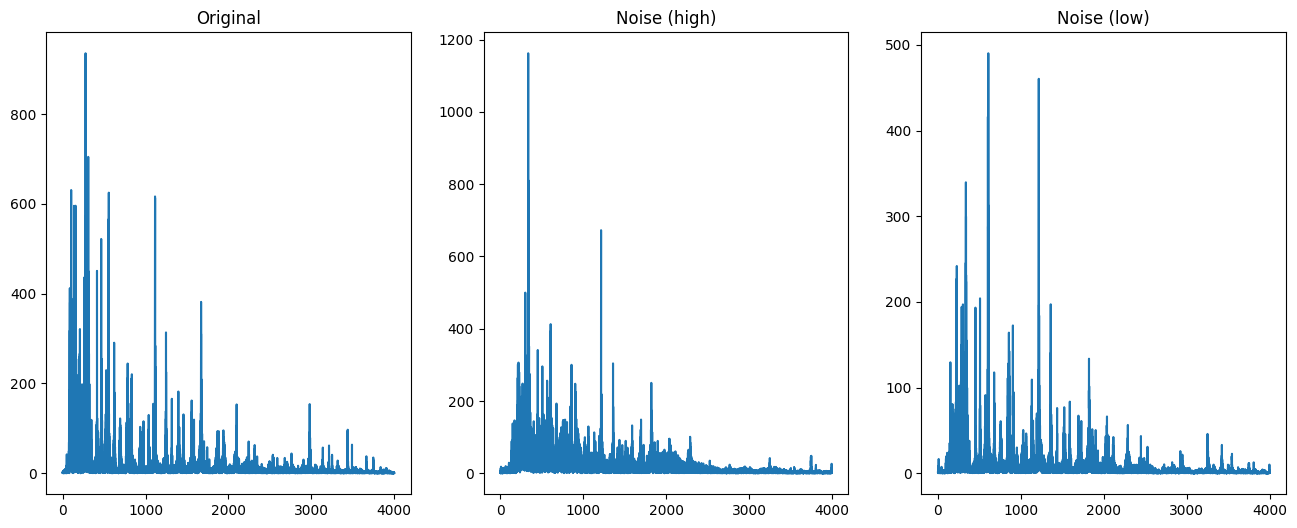

In [70]:
fig, ax = plt.subplots(figsize = (16, 6), ncols=3)

ax[0].plot(f[:N], np.abs(S_org[:N]))
ax[0].set_title('Original')

ax[1].plot(f[:N], np.abs(S_noise_high[:N]))
ax[1].set_title('Noise (high)')

ax[2].plot(f[:N], np.abs(S_noise_low[:N]))
ax[2].set_title('Noise (low)')
plt.show()

In [71]:
S_s = []
S_s.append(librosa.stft(y_org, n_fft=1024, hop_length=512))
S_s.append(librosa.stft(y_noise_high, n_fft=1024, hop_length=512))
S_s.append(librosa.stft(y_noise_low, n_fft=1024, hop_length=512))
noises = ['Original', 'High', 'Low']

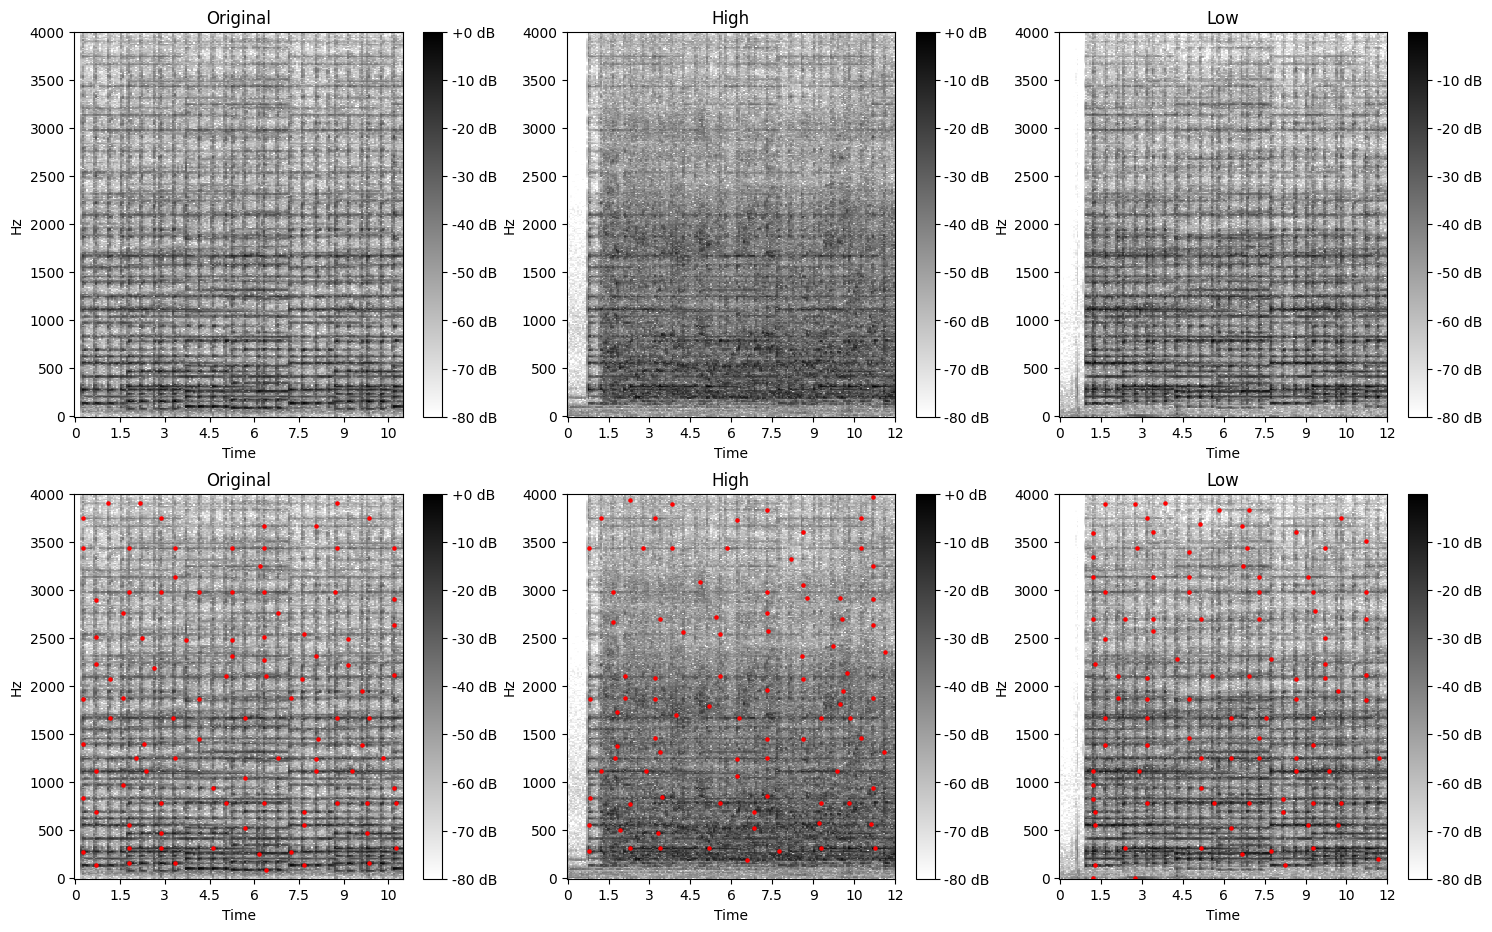

In [72]:
fig, ax = plt.subplots(figsize=(18, 11), nrows=2, ncols=3)
for k, (S, name) in enumerate(zip(S_s, noises)):

    img = librosa.display.specshow(
        data=librosa.amplitude_to_db(np.abs(S), ref=np.max),
        sr=8000,
        n_fft=1024,
        hop_length=512,
        y_axis='linear',
        x_axis='time',
        cmap='gray_r',
        ax=ax[0, k]
    )
    ax[0, k].set_title(name)
    fig.colorbar(img, ax=ax[0, k], format="%+2.f dB")
    
    s = maximum_filter(np.abs(S), size=30)
    maximum_image = s == np.abs(S)
    j, i = np.where(maximum_image)
    t = j * sr / 1024
    f = i * 512 / sr
    coordinates = np.array(list(zip(f, t)))
    
    
    img = librosa.display.specshow(
        data=librosa.amplitude_to_db(np.abs(S), ref=np.max),
        sr=8000,
        n_fft=1024,
        hop_length=512,
        y_axis='linear',
        x_axis='time',
        cmap='gray_r',
        ax=ax[1, k]
    )
    ax[1, k].set_title(name)
    ax[1, k].scatter(coordinates[:, 0], coordinates[:, 1], s=5, color='r')
    fig.colorbar(img, ax=ax[1, k], format="%+2.f dB")

plt.show()